# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [3]:
# read the titanic train.csv file into a dataframe
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [143]:
# show the percentage of the passengers that boarded at different ports


embarked_counts = df_train['Embarked'].value_counts(normalize=True)

for index, value in embarked_counts.items():  
    print(f"{index}: {value:.2%}") 



S: 72.44%
C: 18.90%
Q: 8.66%


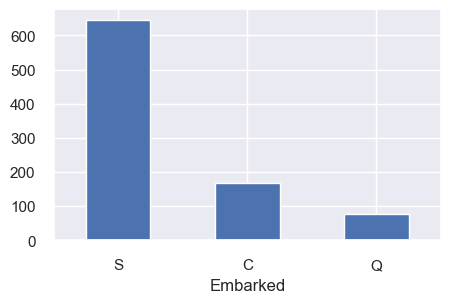

In [140]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize=(5, 3))


number = df_train['Embarked'].value_counts() 


number.plot.bar()
plt.xticks(rotation=0)

plt.show()

![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [39]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.

df_train.groupby('Sex').Survived.value_counts(normalize = True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

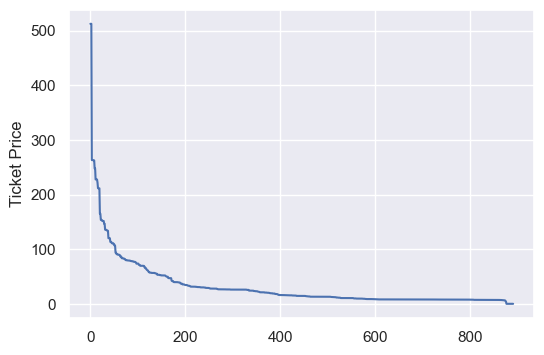

In [73]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize=(6, 4))

sorted_ticket_prices = df_train.sort_values(by='Fare',ascending=False,ignore_index=True)

plt.plot(sorted_ticket_prices.index, sorted_ticket_prices.Fare)

plt.ylabel('Ticket Price')

plt.show()



![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



Text(0.5, 0, 'Pclass = 3')

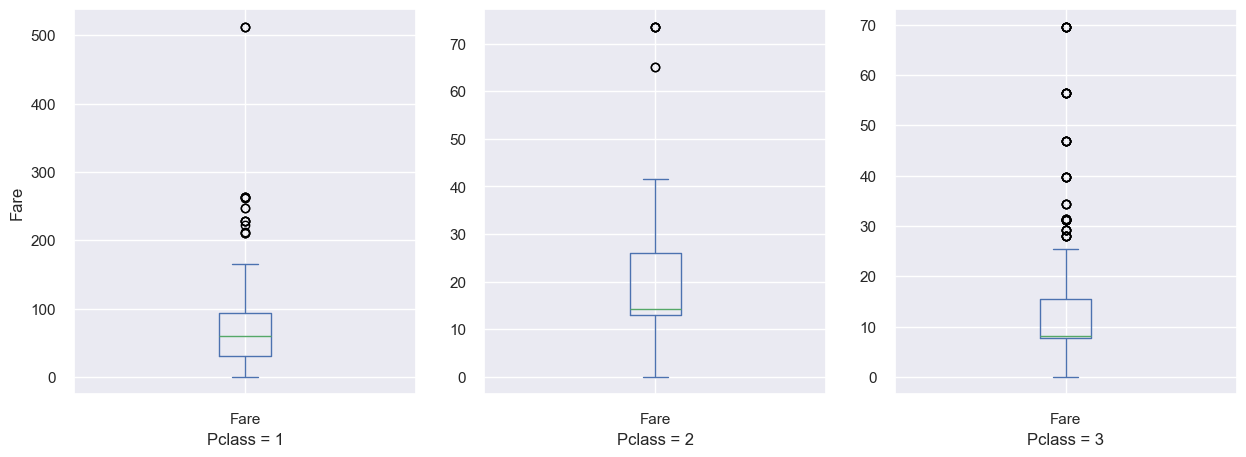

In [146]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below

fig, ax = plt.subplots(1, 3, figsize=(15,5))
df_train[(df_train.Pclass == 1)].Fare.plot.box(ax=ax[0])  
df_train[(df_train.Pclass == 2)].Fare.plot.box(ax=ax[1]) 
df_train[(df_train.Pclass == 3)].Fare.plot.box(ax=ax[2]) 

ax[0].set_xlabel('Pclass = 1')
ax[0].set_ylabel('Fare')

ax[1].set_xlabel('Pclass = 2')

ax[2].set_xlabel('Pclass = 3')



![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [116]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
rate=df_train.groupby('Pclass').Survived.value_counts(normalize = True)
dataframe_rate = rate.reset_index()

survival_rate = dataframe_rate[(dataframe_rate.Survived==1)]
proportion_max = survival_rate.proportion.max()
proportion_max_Pclass = survival_rate.loc[survival_rate.proportion.idxmax(),'Pclass']

print(f'For people with ticket class {proportion_max_Pclass}, the survival rate is the highest, which is {proportion_max:.2%}.')


For people with ticket class 1, the survival rate is the highest, which is 62.96%.


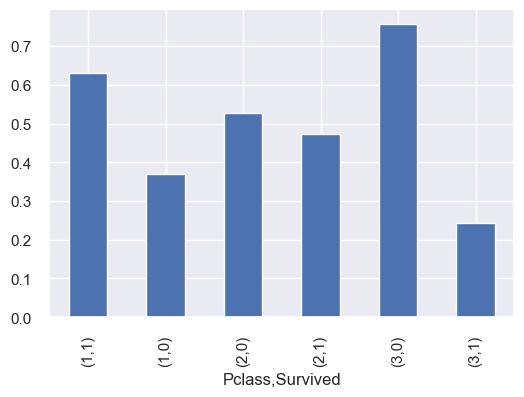

In [135]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize=(6, 4))

rate=df_train.groupby('Pclass').Survived.value_counts(normalize = True)
dataframe_rate = rate.reset_index()

custom_labels = [f"({Pclass},{Survived})" for Pclass, Survived in zip(dataframe_rate.Pclass, dataframe_rate.Survived)] 

dataframe_rate.proportion.plot.bar().set_xticks(dataframe_rate.index, custom_labels)

ax.set_xlabel('Pclass,Survived') 


plt.show()

In [ ]:
dataframe_rate['death_rate'] = np.where(dataframe_rate['Survived'] == 1, 1 - dataframe_rate['proportion'], dataframe_rate['proportion'])  
  

dataframe_rate[(dataframe_rate.Survived == 1)].loc[ : ,['Pclass','proportion','death_rate']]

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
